# Module 1 - In this jupyter notebook, resampling and masking are undertaken as part of preparing the data for further analyses. 
* Step 1a - Import modules/libraries
* Step 1b - Resampling raster data and 
* Step 1c - Filter non-cropped area 

**=====================================================================================================================**

![title](https://github.com/wateraccounting/WAPORWP/blob/master/Notebooks/img/Fig1_1.png?raw=true)

**=====================================================================================================================**

## Step 1a - Import modules/libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os                             # a module for interacting with the operating system
import glob                           # used to retrieve files/pathnames matching a specified pattern
import matplotlib.pyplot as plt       # is a plotting library used for 2D graphics in python 
import numpy as np                    # stands for 'Numerical Python, is a python library used for scientific computing with arrays
from osgeo import ogr, gdal           ### modified GDAL import here and in the GIS_function.py files
import sys
import subprocess

sys.path.insert(0,'/content/drive/My Drive/WAPORWP/Modules')
# sys.path.append(folder) #add folder with local modules to system paths  #change working directory to 'Modules' folder
from WaPOR import GIS_functions as gis             # Import local module in 'Modules' folder

Obtained saved API Token
Your WaPOR API Token is saved into: /content/drive/My Drive/WAPORWP/Modules/WaPOR/wapor_api_token.pickle. 
 If you wish to change your API Token, please delete this file


# Step 1b - Reample raster data

## i) Resample ET reference 

## * Import the input data 

In [ ]:
dir_proj = '/content/drive/My Drive/WAPORWP'
dir_data = "Data"
### modified the date to L2_AETI_1701.tif
source_file   = os.path.join(dir_proj, dir_data,   "WAPOR.v2_dekadal_L2_AETI_D", "L2_AETI_1701.tif") # Read gdal info of template raster file
target_folder = os.path.join(dir_proj, dir_data,   "WAPOR.v2_dekadal_L1_RET_D")                      # data to be resampled 
target_fhs    = glob.glob(target_folder + '/*.tif')

source_file, target_fhs

('/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L2_AETI_D/L2_AETI_1701.tif',
 ['/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_RET_D/L1_RET_1625.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_RET_D/L1_RET_1626.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_RET_D/L1_RET_1627.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_RET_D/L1_RET_1628.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_RET_D/L1_RET_1629.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_RET_D/L1_RET_1630.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_RET_D/L1_RET_1631.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_RET_D/L1_RET_1632.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_RET_D/L1_RET_1633.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_RET_D/L1_RET_1634.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_RET_D/L1_RET_16

## The size and shape of the raster files

In [ ]:
## The size and shape of the raster files
template   = gis.OpenAsArray(source_file, nan_values=True) 
original   = gis.OpenAsArray(target_fhs[0], nan_values=True)

print ('The size & shape of the template raster      =', template.size,  '&', template.shape)
print ('The size & shape of the data to be resampled =', original.size,  '&', original.shape)

The size & shape of the template raster      = 38556 & (153, 252)
The size & shape of the data to be resampled = 25 & (5, 5)


## ** Make or connect with the directory the output folder

In [ ]:
output_folder = os.path.join(dir_proj, dir_data, "1_L1_RET_D_resampled") 

## Make one if the folder does not exit
if not os.path.exists(output_folder):
    os.makedirs(output_folder) 
    
output_folder

'/content/drive/My Drive/WAPORWP/Data/1_L1_RET_D_resampled'

## *** Resample raster data

In [ ]:
Resample = gis.MatchProjResNDV (source_file, target_fhs, output_folder, resample = 'near', dtype = 'float32')

In [ ]:
## The size and shape of the resampled raster files
Resampled   = os.path.join(dir_proj, dir_data,   "1_L1_RET_D_resampled", "L1_RET_1701.tif") 
resampled   = gis.OpenAsArray(Resampled , nan_values=True)

print ('The size & shape of the resampled data =', resampled.size,  '&', resampled.shape)

The size & shape of the resampled data = 38556 & (153, 252)


## ii) Resample Precipitation layers 

## * Import the input data 

In [ ]:
source_file   = os.path.join(dir_proj, dir_data,   "WAPOR.v2_dekadal_L2_AETI_D", "L2_AETI_1701.tif") # Read gdal info of template raster file  
target_folder = os.path.join(dir_proj, dir_data,   "WAPOR.v2_dekadal_L1_PCP_D")                      # data to be resampled 
target_fhs    = glob.glob(target_folder + '/*.tif')

source_file, target_fhs

('/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L2_AETI_D/L2_AETI_1701.tif',
 ['/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_PCP_D/L1_PCP_1625.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_PCP_D/L1_PCP_1626.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_PCP_D/L1_PCP_1627.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_PCP_D/L1_PCP_1628.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_PCP_D/L1_PCP_1629.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_PCP_D/L1_PCP_1630.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_PCP_D/L1_PCP_1631.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_PCP_D/L1_PCP_1632.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_PCP_D/L1_PCP_1633.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_PCP_D/L1_PCP_1634.tif',
  '/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_PCP_D/L1_PCP_16

## The size and shape of the raster files

In [ ]:
## The size and shape of the raster files
template   = gis.OpenAsArray(source_file, nan_values=True) 
original   = gis.OpenAsArray(target_fhs[0], nan_values=True)

print ('The size & shape of the template raster      =', template.size,  '&', template.shape)
print ('The size & shape of the data to be resampled =', original.size,  '&', original.shape)

The size & shape of the template raster      = 38556 & (153, 252)
The size & shape of the data to be resampled = 48 & (6, 8)


## ** Make or connect with the directory the output folder

In [ ]:
output_folder = os.path.join(dir_proj, dir_data, "1_L1_PCP_D_resampled") 

## Make one if the folder does not exit
if not os.path.exists(output_folder):
    os.makedirs(output_folder) 
    
output_folder

'/content/drive/My Drive/WAPORWP/Data/1_L1_PCP_D_resampled'

## *** Resample raster data

In [ ]:
Resample = gis.MatchProjResNDV (source_file, target_fhs, output_folder, resample = 'near', dtype = 'float32')

In [ ]:
## The size and shape of the resampled raster files
Resampled   = os.path.join(dir_proj, dir_data,   "1_L1_RET_D_resampled", "L1_RET_1701.tif") 
resampled   = gis.OpenAsArray(Resampled , nan_values=True)

print ('The size & shape of the resampled data =', resampled.size,  '&', resampled.shape)

The size & shape of the resampled data = 38556 & (153, 252)




# Step 1c - Filiter non-croppped area using land cover map and project boundary

### Land cover map
In WaPOR LCC layer, pixel value **42** represents irrigated cropland (See https://wapor.apps.fao.org/catalog/2/L2_LCC_A). 

![title](https://github.com/wateraccounting/WAPORWP/blob/master/Notebooks/img/Fig1_2.png?raw=true)

### Poject boundary  --- convert shapefile to raster

In [ ]:
# read shapefile and reference raster files
InputVector = os.path.join(dir_proj,dir_data,'1Boundary/Shapefile/Xinavane_1.shp')             # the shapefile of the project
RefImage    = os.path.join(dir_proj,dir_data,'WAPOR.v2_dekadal_L2_AETI_D/L2_AETI_1701.tif') # Reference raster to fix the the pixel size 
OutputImage = os.path.join(dir_proj,dir_data,'1Boundary/mask_irrigation_types.tif')           # name the output raste file 'mask_irrigation_types' and save it in the DAta/1Boundary..
burnVal     = 1                                                         #value for the output image pixels

In [ ]:
# A script to rasterise a shapefile to the same projection & pixel resolution as a reference image.
gdalformat = 'GTiff'
datatype = gdal.GDT_Byte


##########################################################
# Get projection info from reference image
Image = gdal.Open(RefImage, gdal.GA_ReadOnly)

# Open Shapefile
Shapefile = ogr.Open(InputVector)
Shapefile_layer = Shapefile.GetLayer()

# Rasterise
print("Rasterising shapefile...")
Output = gdal.GetDriverByName(gdalformat).Create(OutputImage, Image.RasterXSize, Image.RasterYSize, 1, datatype, options=['COMPRESS=LZW'])
Output.SetProjection(Image.GetProjectionRef())
Output.SetGeoTransform(Image.GetGeoTransform()) 

# Write data to band 1
Band = Output.GetRasterBand(1)
Band.SetNoDataValue(0)
gdal.RasterizeLayer(Output, [1], Shapefile_layer, burn_values=[burnVal])

# Close datasets
Band = None
Output = None
Image = None
Shapefile = None

# Build image overviews
subprocess.call("gdaladdo --config COMPRESS_OVERVIEW DEFLATE "+OutputImage+" 2 4 8 16 32 64", shell=True)
print("Done.")

Rasterising shapefile...
Done.


In [ ]:
RefImage

'/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L2_AETI_D/L2_AETI_1701.tif'

## i) Import the input data 

In [ ]:
# transpiration, evapotranspiration & interceptio and reference evapotranspiration
input_folderT    = os.path.join(dir_proj, dir_data, "WAPOR.v2_dekadal_L2_T_D") 
input_fhsT       = glob.glob(input_folderT + '/*.tif')  # glob.glob returns the list of files with their full path

input_folderAETI = os.path.join(dir_proj, dir_data, "WAPOR.v2_dekadal_L2_AETI_D") 
input_fhsAETI    = glob.glob(input_folderAETI + '/*.tif')   

input_folderRET  = os.path.join(dir_proj, dir_data, "1_L1_RET_D_resampled") 
input_fhsRET     = glob.glob(input_folderRET + '/*.tif')

input_folderNPP  = os.path.join(dir_proj, dir_data, "WAPOR.v2_dekadal_L2_NPP_D") 
input_fhsNPP     = glob.glob(input_folderNPP + '/*.tif')

# Masks: landcover layers and the shape of the project area
input_LCCfolder  = os.path.join(dir_proj, dir_data, "WAPOR.v2_yearly_L2_LCC_A") 
LCC_tifs         = glob.glob(input_LCCfolder + '/*.tif')

ProArea = gis.OpenAsArray(os.path.join(dir_proj,dir_data,'1Boundary/mask_irrigation_types.tif'), nan_values=True)  # the project boundary/area (tif)

## ii) Output folder: Make one or connect to the existing one

In [ ]:
output_folderT    = os.path.join(dir_proj, dir_data, "1_L2_T_filtered")
output_folderAETI = os.path.join(dir_proj, dir_data, "1_L2_AETI_filtered")
output_folderRET  = os.path.join(dir_proj, dir_data, "1_L1_RET_filtered")
output_folderNPP  = os.path.join(dir_proj, dir_data, "1_L2_NPP_filtered")
 

## Make one if the folder does not exit
if not os.path.exists(output_folderT):
    os.makedirs(output_folderT) 
if not os.path.exists(output_folderAETI):
    os.makedirs(output_folderAETI) 
if not os.path.exists(output_folderRET):
    os.makedirs(output_folderRET) 
if not os.path.exists(output_folderNPP):
    os.makedirs(output_folderNPP) 
    
output_folderAETI, output_folderRET

('/content/drive/My Drive/WAPORWP/Data/1_L2_AETI_filtered',
 '/content/drive/My Drive/WAPORWP/Data/1_L1_RET_filtered')

#### Plot project area 

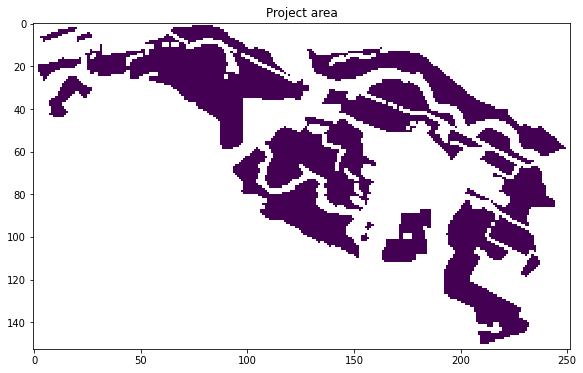

In [ ]:
### Plot project area 
Projectboundary = ProArea

# Plot
plt.figure(figsize = (12,6))
plt.imshow(Projectboundary)                          
plt.title('Project area')
plt.show();

#### Plot raster layer (before removing the non-cropped area)

In [ ]:
input_fhsAETI[0]

'/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L2_AETI_D/L2_AETI_0901.tif'

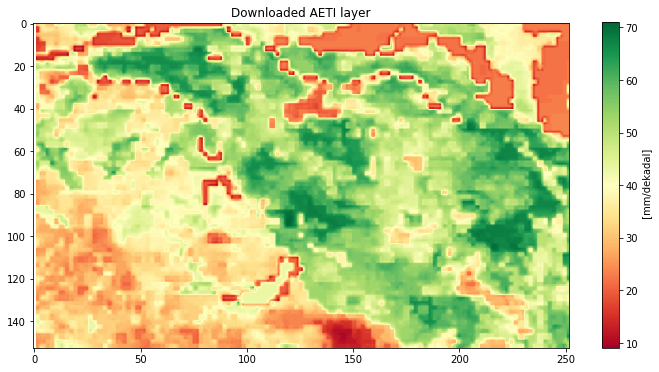

In [ ]:
# Plot REF layer 
AETI_tif = gis.OpenAsArray(input_fhsAETI[0],nan_values=True)

plt.figure(figsize = (12,8))
plt.imshow(AETI_tif, cmap='RdYlGn')
plt.colorbar(shrink=0.75, label=' [mm/dekadal]')
plt.title('Downloaded AETI layer')
plt.show()

#### Plot raser layer on irrigated cropped land (masking out non-irrigated cropped land)

In [ ]:
LCC_tifs[0]

'/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_yearly_L2_LCC_A/L2_LCC_09.tif'

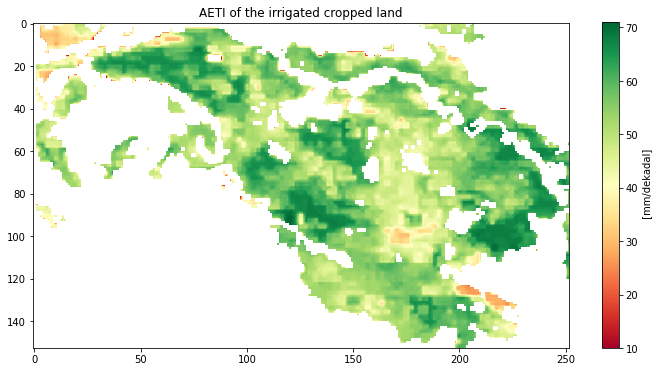

In [ ]:
# Mask out the non-irrigated cropped land
LCC       = gis.OpenAsArray(LCC_tifs[0],nan_values=True)  # land cover map
AETI_crop = np.where((LCC==42), AETI_tif,np.nan)          # Show AETI on irrigated crop land, which has land class value of 42

# Plot AETI on irrigated cropped land
plt.figure(figsize = (12,8))
plt.imshow(AETI_crop, cmap='RdYlGn')    
plt.colorbar(shrink=0.75, label=' [mm/dekadal]')                          
plt.title('AETI of the irrigated cropped land')
plt.show()

#### Plot raser layer on  irrigated cropped land and within the boundary of the scheme

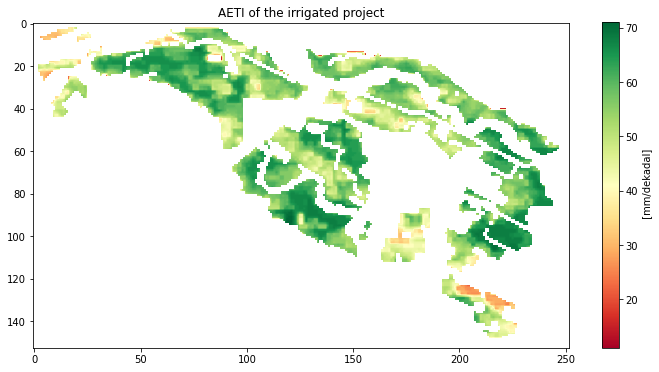

In [ ]:
# Mask out the non-irrigated cropped land and area outside the scheme boundary
AETI_boundary = np.where((LCC==42)& (ProArea==1),AETI_tif,np.nan) # masking out the non-irrigated crop land and areas outside the projedct area

# Plot
plt.figure(figsize = (12,8))
plt.imshow(AETI_boundary, cmap='RdYlGn')   
plt.colorbar(shrink=0.75, label=' [mm/dekadal]')                          
plt.title('AETI of the irrigated project')
plt.show()

## iii) Filter non-croppped area using land cover map and project boundary

* LCC     = for instance # 42 is the land cover class of crop land under irrigation water management
* ProArea = 1 the raster value of the project area in tiff format

### Filter transpiration layers

In [ ]:
# collecting Geoinfo such as projection, the x and y axis
in_fh = input_fhsT[0]     
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

for Tfh in input_fhsT: 
    for LCCfh in LCC_tifs:
        T   = gis.OpenAsArray(Tfh,  nan_values=True)
        LCC = gis.OpenAsArray(LCCfh, nan_values=True)
        basename1  = os.path.basename(Tfh).split('_')[2].split('.')[0]    #L2_T_0901.tif, 0901.tif, 0901
        basename1  = int(str(basename1)[:2])                              # 09

        basename2  = os.path.basename(LCCfh).split('_')[2].split('.')[0]   #L2_LCC_09.tif, 09.tif, 09
        
        if basename1 == int(basename2):     #compare the year of the LCC and the raster layer (T)
            
            # masking out the non-irrigated crop land and areas outside the projedct area
            T   = np.where((LCC==42)& (ProArea==1),T,np.nan) 
            
            # update the file name, and save into output folder
            basename  = os.path.basename(Tfh)
            output_fn = os.path.join(output_folderT, basename)
            gis.CreateGeoTiff(output_fn, T, driver, NDV, xsize, ysize, GeoT, Projection) 

### Filter evapotranspiration layers

In [ ]:
# collecting Geoinfo such as projection, the x and y axis
in_fh = input_fhsAETI[0]   
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

for AETIfh in input_fhsAETI:
    for LCCfh in LCC_tifs:
        AETI = gis.OpenAsArray(AETIfh,  nan_values=True)
        LCC = gis.OpenAsArray(LCCfh, nan_values=True)
        basename1  = os.path.basename(AETIfh).split('_')[2].split('.')[0]   
        basename1  = int(str(basename1)[:2])                             

        basename2  = os.path.basename(LCCfh).split('_')[2].split('.')[0]   
        
        if basename1 == int(basename2):     #compare the year of the LCC and the raster layer (AETI)
            
            # masking out the non-irrigated crop land and areas outside the projedct area
            AETI = np.where((LCC==42)& (ProArea==1),AETI,np.nan)     
    
            # update the file name, and save into output folder
            basename  = os.path.basename(AETIfh)
            output_fn = os.path.join(output_folderAETI, basename)
            gis.CreateGeoTiff(output_fn, AETI, driver, NDV, xsize, ysize, GeoT, Projection) 

### Filter reference evapotranspiration layers

In [ ]:
# collecting Geoinfo such as projection, the x and y axis
in_fh = input_fhsRET[0]   
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

for RETfh in input_fhsRET:
    for LCCfh in LCC_tifs:
        RET = gis.OpenAsArray(RETfh,  nan_values=True)
        LCC = gis.OpenAsArray(LCCfh, nan_values=True)
        basename1  = os.path.basename(RETfh).split('_')[2].split('.')[0]   
        basename1  = int(str(basename1)[:2])                              

        basename2  = os.path.basename(LCCfh).split('_')[2].split('.')[0]  
        
        if basename1 == int(basename2):     #compare the year of the LCC and the raster layer (REF)
            
            # masking out the non-irrigated crop land and areas outside the projedct area
            RET = np.where((LCC==42)& (ProArea==1),RET,np.nan)     
        
            # update the file name, and save into output folder
            basename  = os.path.basename(RETfh)
            output_fn = os.path.join(output_folderRET, basename)
            gis.CreateGeoTiff(output_fn, RET, driver, NDV, xsize, ysize, GeoT, Projection) 

### Filter NPP layers

In [ ]:
# collecting Geoinfo such as projection, the x and y axis
in_fh = input_fhsNPP[0]   
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

for NPPfh in input_fhsNPP:
    for LCCfh in LCC_tifs:
        NPP = gis.OpenAsArray(NPPfh,  nan_values=True)
        LCC = gis.OpenAsArray(LCCfh, nan_values=True)
        basename1  = os.path.basename(NPPfh).split('_')[2].split('.')[0]    
        basename1  = int(str(basename1)[:2])                             

        basename2  = os.path.basename(LCCfh).split('_')[2].split('.')[0]   
        
        if basename1 == int(basename2):     
            
            # masking out the non-irrigated crop land and areas outside the projedct area
            NPP = np.where((LCC==42)& (ProArea==1),NPP,np.nan)      
            
            # update the file name, and save into output folder
            basename  = os.path.basename(NPPfh)
            output_fn = os.path.join(output_folderNPP, basename)
            gis.CreateGeoTiff(output_fn, NPP, driver, NDV, xsize, ysize, GeoT, Projection) 